## 2.6. Probability and Statistics
https://d2l.ai/chapter_preliminaries/probability.html


## 2.6.8. Exercises 2

<ipython-input-2-90995b630509>:38: RuntimeWarning: Mean of empty slice
  avg_uncertainties.append(np.nanmean(se_trials))


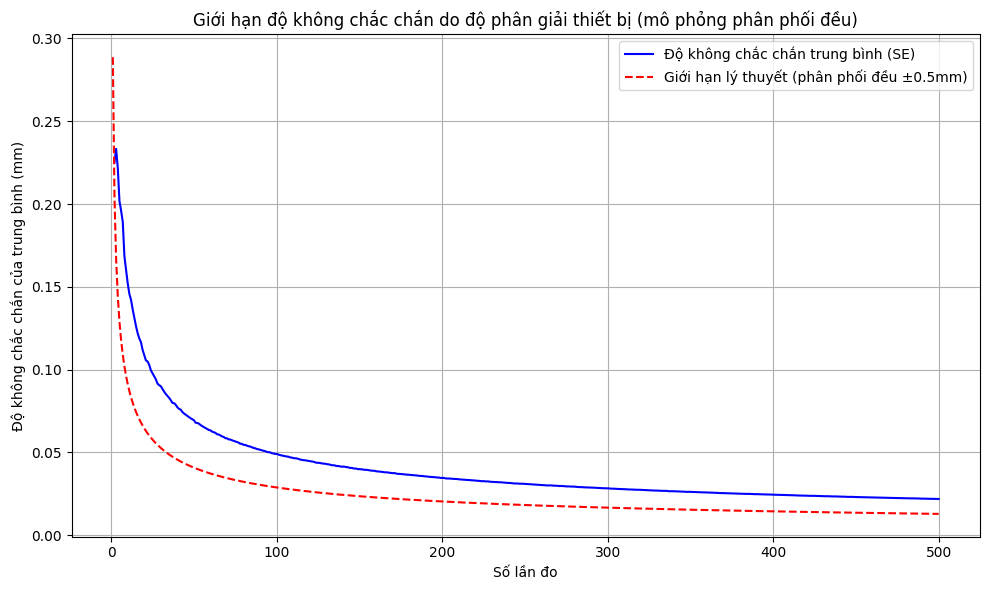

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Chiều dài thật sự của vật thể (mm)
true_length = 153.6

# Độ phân giải của thước đo (1 mm)
measurement_resolution = 1.0

# Danh sách số lần đo tăng dần từ 1 đến 500
num_measurements_list = np.arange(1, 501)

# Danh sách lưu độ không chắc chắn trung bình qua nhiều lần mô phỏng
avg_uncertainties = []

# Số lần lặp lại để lấy trung bình SE (Monte Carlo)
num_trials = 100

for n in num_measurements_list:
    se_trials = []

    for _ in range(num_trials):
        # Sai số do làm tròn theo phân phối đều ±0.5mm (chỉ xét sai số làm tròn)
        rounding_error = np.random.uniform(low=-0.5, high=0.5, size=n)
        raw_measurements = true_length + rounding_error

        # Làm tròn theo độ phân giải của thiết bị
        rounded_measurements = np.round(raw_measurements / measurement_resolution) * measurement_resolution

        if n > 1:
            std_error = np.std(rounded_measurements, ddof=1) / np.sqrt(n)
        else:
            std_error = np.nan

        se_trials.append(std_error)

    # Trung bình độ không chắc chắn qua các lần mô phỏng
    avg_uncertainties.append(np.nanmean(se_trials))

# Đường giới hạn lý thuyết của sai số làm tròn phân phối đều ±0.5mm
# Std của phân phối đều = (b - a)/sqrt(12)
theoretical_limit = (1.0 / np.sqrt(12)) / np.sqrt(num_measurements_list)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(num_measurements_list, avg_uncertainties, label='Độ không chắc chắn trung bình (SE)', color='blue')
plt.plot(num_measurements_list, theoretical_limit, linestyle='--', color='red', label='Giới hạn lý thuyết (phân phối đều ±0.5mm)')
plt.xlabel('Số lần đo')
plt.ylabel('Độ không chắc chắn của trung bình (mm)')
plt.title('Giới hạn độ không chắc chắn do độ phân giải thiết bị (mô phỏng phân phối đều)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
